In [31]:
import numpy as np

class AdalineGD(object):
    """
    [Parameter]
    eta : float 学習率
    n_iter : int トレーニング回数
    random_state : 重み初期化の乱数シード
    
    [data]
    w_ : array(1)  重み
    errors_ : list 各エポックの誤分類の数
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        [Parameter]
        X : DataFrame サンプルデータ shape[0]=column(a number of samples), shape[1]=raw(a number of features) 
        y : array 目的変数データ
        
        [return]
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            
            net_input = self.net_input(X) # wX=推測値のベクトル
            output = self.activation(net_input) # ADALINEでは恒等変換(output = net_input)
            errors = (y-output)
            
            self.w_[1:] += self.eta * X.T.dot(errors) #XとΔyの内積
            self.w_[0] += self.eta * errors.sum()
            
            cost = (errors**2).sum()/2.0
            
            self.cost_.append(cost)
#             print("{0},{1}".format(X.T.dot(errors)[0], X.T.dot(errors)[1]))
            
#         print(" ")
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0] # w0+w1*x1+w2*x2+...
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >=0.0, 1, -1)
    

In [2]:
import pandas as pd

df = pd.read_csv('./python-machine-learning-book-2nd-edition-master/code/ch02/iris.data', header=None)
#  df = pd.read_csv('https://archive.ics.uci.edu/ml/'
#                   'machine-learning-databases/iris/iris.data', header=None)

df.tail()

# df.shape[1]

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


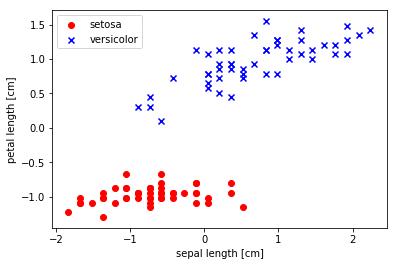

In [35]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)

x = df.iloc[0:100, [0,2]].values
X =np.copy(x)

X[:,0] = (x[:,0] - x[:,0].mean())/x[:,0].std()
X[:,1] = (x[:,1] - x[:,1].mean())/x[:,1].std()


plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[51:100,0], X[51:100,1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

plt.legend(loc='upper left')

plt.show()

In [43]:
rgen = np.random.RandomState(50)
r=rgen.permutation(len(y))
X[r]

array([[ 0.04542025,  0.65079974],
       [ 0.35866332,  0.44265484],
       [-0.73768744, -0.87559625],
       [ 0.35866332, -0.94497788],
       [-0.5810659 , -0.94497788],
       [-0.73768744, -1.08374115],
       [ 0.04542025,  0.78956302],
       [-0.5810659 , -1.01435952],
       [-0.89430898,  0.30389157],
       [ 2.39474331,  1.27523447],
       [ 0.35866332, -0.80621461],
       [ 0.20204178,  0.72018138],
       [ 1.29839254,  1.06708956],
       [-0.11120129, -1.08374115],
       [-1.36417359, -1.01435952],
       [-1.36417359, -0.94497788],
       [-1.67741667, -1.08374115],
       [ 2.23812177,  1.41399774],
       [-1.67741667, -1.01435952],
       [-0.89430898, -0.94497788],
       [-0.5810659 , -0.66745134],
       [ 1.29839254,  1.41399774],
       [-0.42444437,  0.72018138],
       [ 0.98514947,  1.20585283],
       [-0.5810659 ,  0.09574666],
       [ 0.51528486, -1.15312279],
       [-0.5810659 , -0.94497788],
       [-1.05093052, -1.01435952],
       [ 1.76825716,

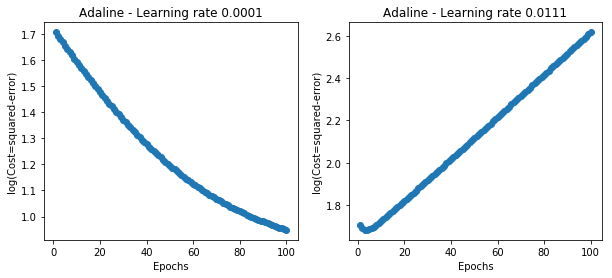

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

N=100
l_rate1 =0.0001
l_rate2 =0.0111

adaline1 = AdalineGD(n_iter=N, eta=l_rate1).fit(X,y)

ax[0].plot(range(1,len(adaline1.cost_)+1), np.log10(adaline1.cost_), marker='o')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Cost=squared-error)')

ax[0].set_title('Adaline - Learning rate {0}'.format(l_rate1))


adaline2 = AdalineGD(n_iter=N, eta=l_rate2).fit(X,y)

ax[1].plot(range(1,len(adaline2.cost_)+1), np.log10(adaline2.cost_), marker='o')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Cost=squared-error)')

ax[1].set_title('Adaline - Learning rate {0}'.format(l_rate2))

plt.show()

In [25]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1 
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1 
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], label=cl, edgecolor='black')
    

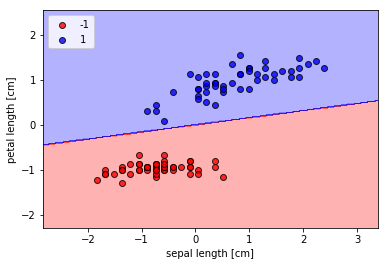

In [26]:
plot_decision_regions(X, y, classifier=adaline2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

plt.legend(loc='upper left')

plt.show()